## Perceived importance of Covid-19 in college students, what factors make a difference?

![College Covid Picture](assets/CollegeCovid.jpeg)

## Refer to the 

In [1]:
#This cell loads the packages we will need to run our code
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

## 1. Read the Data In
In this cell I will read in the raw study responses file into the data frame and display the headers of my columns to make sure the data was loaded in correctly. This also gives you the ability to see the questions asked before I clean the data and change the column names. 



In [2]:
df = pd.read_excel('data/Raw_Study_Responses.xlsx')
headers_df = pd.read_excel('data/Raw_Study_Responses.xlsx', header=0)
print(headers_df.columns)

Index(['Timestamp', 'Have you read the informed consent linked above? ',
       'Are you at least 18 years old?', 'What is your biological sex?',
       'What is your college major?', 'What grade in college are you?',
       'Have you or has anyone you know ever contracted Covid-19?',
       'How important is taking proper precautions to prevent exposure to Covid-19 to you?',
       'How important is getting vaccinated against Covid-19 to you?',
       'How important is wearing masks to help slow the spread of transmission of Covid-19 to you?',
       'How important is social distancing to help slow the spread of Covid-19 to you?',
       'Have you received any vaccinations to help prevent Covid-19?',
       'If no to the above question, do you plan on getting a vaccination to help prevent Covid-19?',
       'How important will Covid-19 be in your selected field of study once you graduate?',
       'My college has taken proper steps in preventing the spread of Covid-19',
       'My col

## 2. Clean the data
As you can see from step 1, my column names are quite long, here I will clean various columns in my data and copy the new data into a new excel file. 

In [3]:
#I will change the column names from the questions to a dictionary with shorter names
new_names = {'What is your biological sex?': 'biosex',
             'What is your college major?': 'college_major',
             'What grade in college are you?': 'college_grade',
             'Have you or has anyone you know ever contracted Covid-19?': 'question_1',
             'How important is taking proper precautions to prevent exposure to Covid-19 to you?': 'question_2',
             'How important is getting vaccinated against Covid-19 to you?': 'question_3',
             'How important is wearing masks to help slow the spread of transmission of Covid-19 to you?': 'question_4',
             'How important is social distancing to help slow the spread of Covid-19 to you?': 'question_5',
             'Have you received any vaccinations to help prevent Covid-19?': 'question_6',
             'My college classes have updated their curriculum in response to Covid-19': 'question_7'}
df = df.rename(columns=new_names)

#Here I will drop unneeded columns from this study
df = df.drop(columns=['If no to the above question, do you plan on getting a vaccination to help prevent Covid-19?', 'How important will Covid-19 be in your selected field of study once you graduate?', 'My college has taken proper steps in preventing the spread of Covid-19'])

#Here I will remove subjects under the age of 18
df = df[df['Are you at least 18 years old?'] == 'Yes']

#Here I will drop all rows that are either blank, say "Undecided" or "Dual Credit" from the college_major column
df = df.drop(df[(df['college_major'] == '') | (df['college_major'] == 'Undecided') | (df['college_major'] == 'Dual Credit')].index)

#Here I will create a list of STEM majors covered in my study, then create a column and categorize answers for STEM vs non-STEM majors
stem_majors = ['Nursing', 'Digital Marketing', 'Psychology', 'Exercise Science', 'Health and Physical Education', 'Secondary Math Education', 'Elementary Education', 'Biology', 'Education', 'Health Promotion', 'Physical Education', 'Chemistry']
df["college_major"] = df["college_major"].astype(str).str.strip()
df["STEMvsNon-STEM"] = df["college_major"].apply(lambda x: "STEM" if x in stem_majors else "Non-STEM")

#Now I will save everything to a new data file
df.to_excel('data/updated_data.xlsx', index=False)
    


## 3. Visualize the data
All this data looks boring, lets spruce it up a bit with some graphs

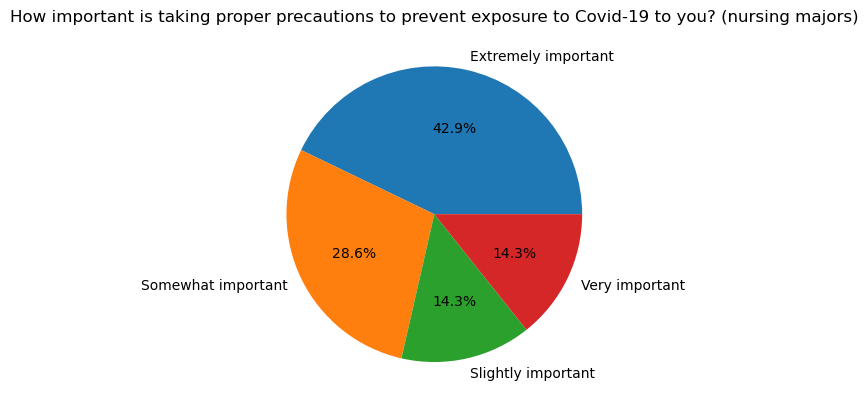

In [4]:
#Load in our new edited spreadsheet 
df = pd.read_excel('data/updated_data.xlsx')

#Basic pie chart showing the answers of nurses to question_2 (How important is taking proper precautions to prevent exposure to Covid-19 to you?).
#I first create both nursing and non-nursing dataframe elements to call upon later.
nursing_df = df[df['college_major'] == 'Nursing']
non_nursing_df = df[df['college_major'] != 'Nursing']
#Then I'll create counts for both dataframe elements.
counts = nursing_df['question_2'].value_counts()
counts_nn = non_nursing_df['question_2'].value_counts()
#Last I will create the pie chart and have the percent down to 1 number after the decimal. 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('How important is taking proper precautions to prevent exposure to Covid-19 to you? (nursing majors)')
plt.show()

These answers were on a scale of: Not at all important, Slightly important , Somewhat important , Very important and Extremely important. Luckily, no nursing major answered "Not at all important" but the next two answer choices, Slightly and Somewhat important, combined to make up over 42% of the answers to the question. 

## Lets see the same chart but with non-nursing majors

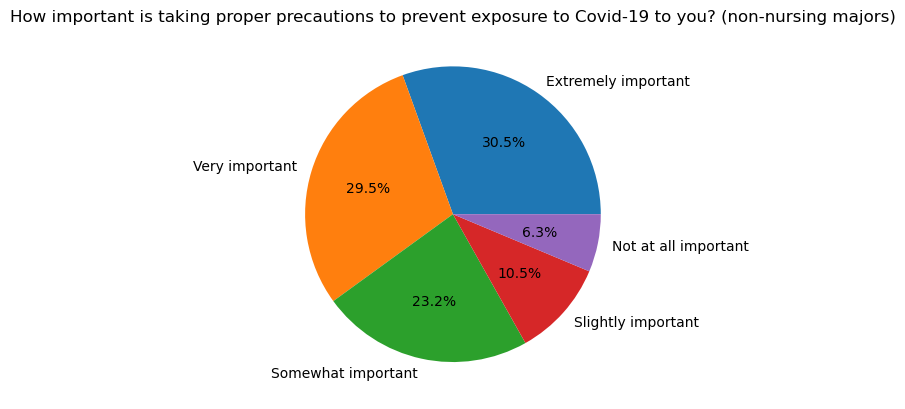

In [5]:
#Same question, but for non-nursing majors
#Basicaly just copying the previous blocks code and changing the counts, label, and title
plt.pie(counts_nn, labels=counts_nn.index, autopct='%1.1f%%')
plt.title('How important is taking proper precautions to prevent exposure to Covid-19 to you? (non-nursing majors)')
plt.show()


Now we can see the difference in the questions between nursing majors and non-nursing majors. The nursing majors had no one answer "not at all important" but had over 42% of answers in the "slightly" or "somewhat important" but for non-nursing majors if you include "not at all important" to that same criteria you have 40% exactly. While this is a small sample size of people, it is interesting to see these results.

When we grouped "non-nursing majors" we also included various STEM majors into that category, so what if we changed our chart to show the same question, but between STEM (Science, Technology, Engineering, Mathematics) and non-stem majors. Back in our cleaning data block I created a list that included each STEM major that was represented in the study and came up with the list of: Nursing, Digital Marketing, Psychology, Exercise Science, Health and Physical Education, Secondary Math Education, Elementary Education, Biology, Education, Health Promotion, Physical Education, and Chemistry. So far that column that was created hasn't been used, let's use it here.

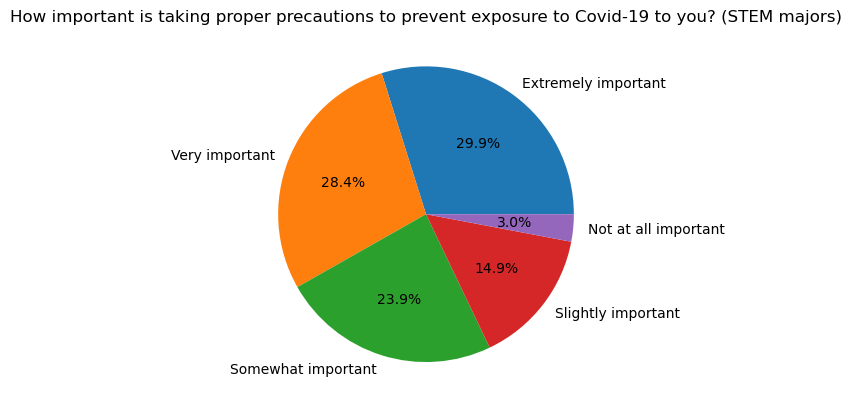

In [6]:
#Lets start by making an element for just STEM majors
stem_df = df[df['STEMvsNon-STEM'] == 'STEM']
counts_stem = stem_df['question_2'].value_counts()
plt.pie(counts_stem, labels=counts_stem.index, autopct='%1.1f%%')
plt.title('How important is taking proper precautions to prevent exposure to Covid-19 to you? (STEM majors)')
plt.show()

So STEM majors, the majors that are more likely to be doctors, engineers, biologists, educators, and nurses have a chart that is more like non-nursing majors. The "Extremely important" category reduces from 42.9% in just nursing majors, to 29.9% when grouped with other STEM majors. 

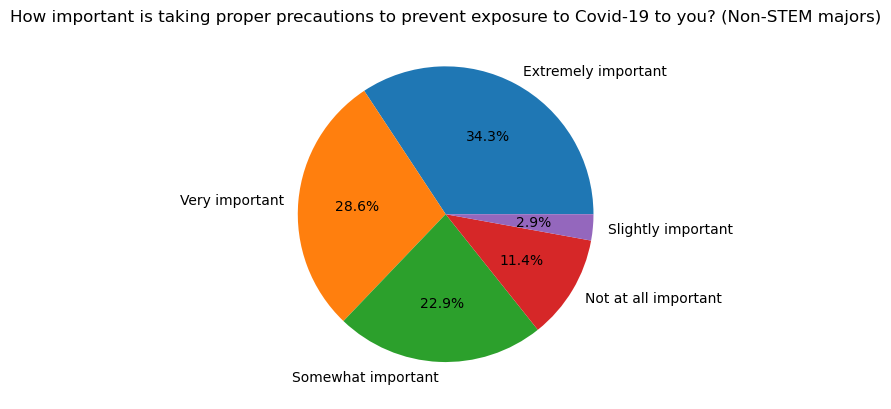

In [7]:
#Now lets create the same graph for Non-STEM majors
non_stem_df = df[df['STEMvsNon-STEM'] != 'STEM']
counts_nonstem = non_stem_df['question_2'].value_counts()
plt.pie(counts_nonstem, labels=counts_nonstem.index, autopct='%1.1f%%')
plt.title('How important is taking proper precautions to prevent exposure to Covid-19 to you? (Non-STEM majors)')
plt.show()

The graph for Non-STEM is very similar to STEM except on the higher end of the answers (Very and Extremely important) the Non-STEM have a higher percentage of answers. 

Pie charts are fun, lets see how data looks in a bar graph

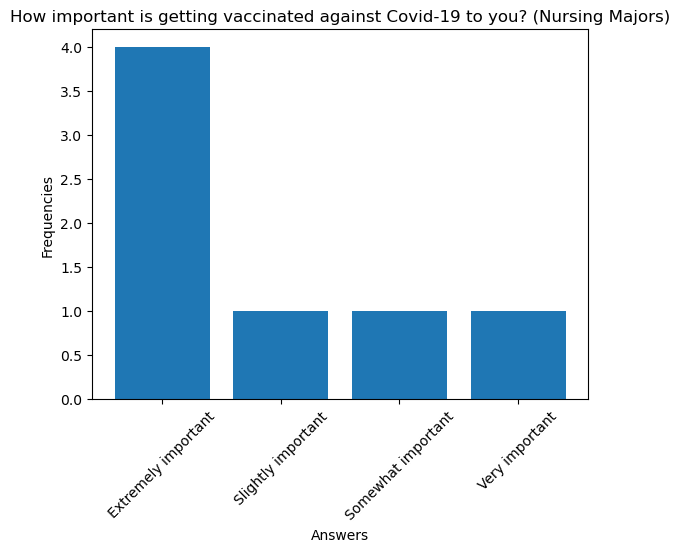

In [8]:
#Here I will do a bar chart of nursing majors in relation to the question "How important is getting vaccinated against Covid-19 to you?"
#I'll start by making an element that groups the answers together
grouped_df_nursing = nursing_df.groupby('question_3').size().reset_index(name='counts')
#Then I'll make the bar chart and rotate the x-axis questions to make it more readable
plt.bar(grouped_df_nursing['question_3'], grouped_df_nursing['counts'])
plt.xticks(rotation=45)
plt.xlabel('Answers')
plt.ylabel('Frequencies')
plt.title('How important is getting vaccinated against Covid-19 to you? (Nursing Majors)')
plt.show()

The bar graph is great for certain things, but I'm not a big fan of this one because it shows that our data set is actually quite small. Pie charts work much better for what I am trying to display, and even if I do not plot every value from my data, from the way it's written above the user can make new cells and copy and paste data to make all kinds of interesting visualizations!